# SCC403 Dataset 2

### 1. Import library & data

In [1]:
%%capture
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
plt.rcParams.update(plt.rcParamsDefault)


WLA_col = ['W','L','A']
Labels_col = ['Labels']
X = pd.read_csv('Data Files/WLA.csv', names=WLA_col, header=None)
y = pd.read_csv('Data Files/Labels.csv', names=Labels_col, header=None)


### 2. Data pre-processing

The first 16 data only motorcycle data, can not be compared with the car, so delete

In [2]:
X = X.iloc[16:]
y = y.iloc[16:]

Several of these features have collinearity

Text(0.5, 1, 'Corr between Features')

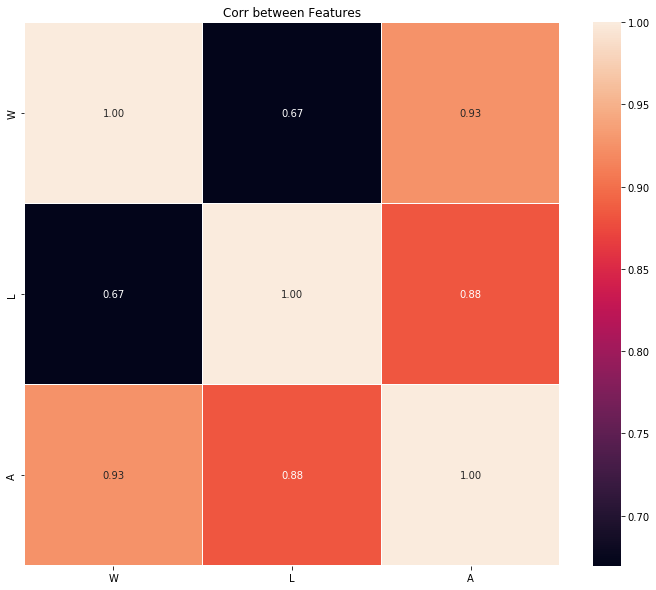

In [3]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", linewidths=0.3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Corr between Features")

Normalization

In [4]:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
X_scale.shape

(172, 3)

### 3. Dimensionality reduction with PCA

To get more than 90% of variance explained I need 2 principal components.

Text(0, 0.5, 'Cumlative Explained Variance')

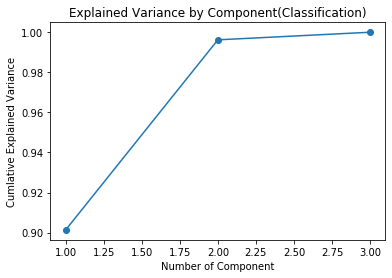

In [5]:
pca = PCA()
pca.fit(X_scale)
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Explained Variance by Component(Classification)")
plt.xlabel("Number of Component")
plt.ylabel("Cumlative Explained Variance")

In [6]:
pca = PCA(n_components=2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
X_pca = pd.DataFrame(X_pca,columns=['Component1','Component2'])

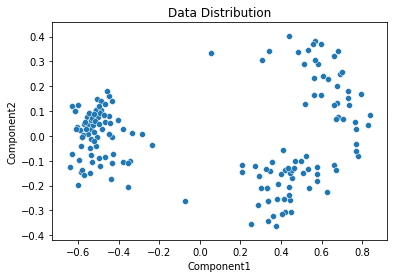

In [7]:
sns.scatterplot(data=X_pca,x=X_pca.iloc[:,0],y=X_pca.iloc[:,1])
plt.title("Data Distribution")
plt.show()

### 4. Model training

Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

LogisticRegression and cross validation

/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

LogisticRegression accuracy after 10 fold CV: 0.99 (+/- 0.04)
Training time: 0.461s


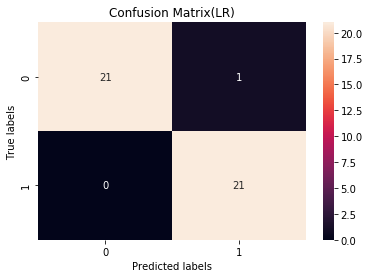

In [9]:
start = time.time()
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(LR, X, y, cv=10)

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix(LR)')
print("LogisticRegression accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Training time: "+ str(round(time.time() - start, 3)) + "s")

/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


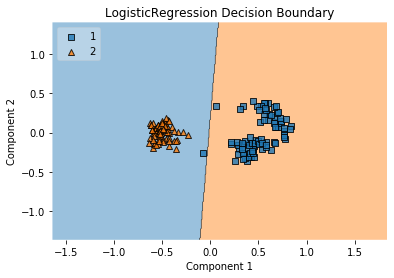

In [10]:
plot_decision_regions(X_pca.to_numpy(), y.Labels.to_numpy(), clf=LR, legend=2)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LogisticRegression Decision Boundary')
plt.show()


SVM and cross validation

/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

LogisticRegression accuracy after 10 fold CV: 0.99 (+/- 0.04)
Training time: 0.319s


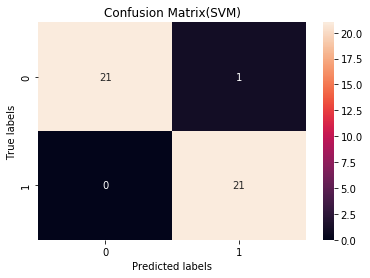

In [11]:
start = time.time()
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(SVM, X, y, cv=10)

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix(SVM)')
print("LogisticRegression accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Training time: "+ str(round(time.time() - start, 3)) + "s")

/Users/dino1g/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


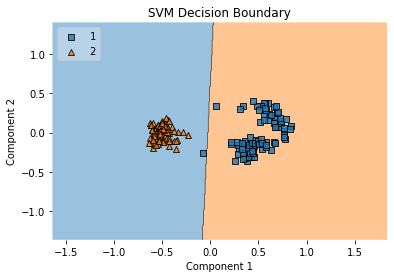

In [12]:
plot_decision_regions(X_pca.to_numpy(), y.Labels.to_numpy(), clf=SVM, legend=2)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVM Decision Boundary')
plt.show()
